### File to prepare number count maps of different galaxy types at various resolutions

Todo:

1. Remove LMC
2. Generate Maps of LRG, ELG, QSO in North and South
3. Generate Maps of Targets and of Predicted number of galaxies
4. Generate Maps at 256 and at 2048
5. Export Maps

write_map(filename, m[, nest, dtype, …])

In [10]:
import pandas as pd
import healpy as hp
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Generating Target Maps at NSIDE 256

In [11]:
NSIDE = 256
NPIX = hp.nside2npix(NSIDE)


In [ ]:
df_north = pd.read_csv('../models/regression/results/north_complete.csv')
df_south = pd.read_csv('../models/regression/results/south_complete.csv')
df_des = pd.read_csv('../models/regression/results/des_complete.csv')
df_north.drop(columns=['y_gold_y', 'y_gold_x', 'y_gold'], inplace=True)
df_south.drop(columns=['y_gold_y', 'y_gold_x', 'y_gold'], inplace=True)
df_des.drop(columns=['y_gold_y', 'y_gold_x', 'y_gold'], inplace=True)


In [7]:
df_north.describe()

,pixel_id,lrg,elg,qso,exposures,stellar,EBV,airmass,ccdskysb_g,ccdskysb_r,...,seeing_z,lrg_lin,elg_lin,qso_lin,lrg_nn,elg_nn,qso_nn,lrg_deep,elg_deep,qso_deep
count,97512.000000,97512.000000,97512.000000,97512.000000,97512.000000,97512.000000,97512.000000,97512.000000,97512.000000,97512.000000,...,97512.000000,97512.000000,97512.000000,97512.000000,97512.000000,97512.000000,97512.000000,97512.000000,97512.000000,97512.000000
mean,92727.060372,35.284242,124.994093,153.217953,0.241254,0.138893,0.133994,0.189980,0.760625,0.621835,...,0.085072,35.293191,124.979752,153.171268,35.739790,126.762165,152.808610,35.391083,125.250448,151.974754
std,52362.454442,11.989440,22.236808,28.685116,0.116953,0.130899,0.127760,0.173179,0.097261,0.090132,...,0.035446,1.773044,8.916475,8.909811,1.791899,9.452861,10.061837,1.772205,10.721035,10.901988
min,1672.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,30.459739,64.411747,96.609871,24.010534,0.000000,44.175816,24.518848,-16.683737,33.930271
25%,47548.750000,27.000000,111.000000,134.000000,0.181818,0.058577,0.049275,0.048089,0.717936,0.574291,...,0.061880,34.213938,120.735014,147.685293,34.482845,121.955553,146.828365,34.250332,120.748043,142.898087
50%,91531.500000,34.000000,125.000000,152.000000,0.209790,0.087866,0.083369,0.133068,0.777146,0.635936,...,0.080584,34.750888,125.910090,153.254823,35.118738,127.105034,153.157562,34.913462,126.001419,150.590439
75%,137463.250000,41.000000,139.000000,171.000000,0.244755,0.167364,0.177345,0.279442,0.828575,0.682960,...,0.102415,35.933562,130.341464,159.073430,36.766582,131.997932,160.448380,36.273582,131.360260,161.701023
max,186645.000000,131.000000,285.000000,334.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,45.856045,204.662816,197.639034,44.132565,168.240814,181.350739,44.580502,191.120193,185.263977


In [28]:
pdList = [df_south, df_north, df_des]  # List of your dataframes
df = pd.concat(pdList)

df.describe()


print(len(df.pixel_id))
df = df.drop_duplicates(subset=['pixel_id'], keep=False)
print(len(df.pixel_id))


369800
356954


### Generating Maps of Gold Standard

In [ ]:
m_LRG = np.zeros(NPIX)

m_LRG[df.pixel_id.to_numpy()] = df.lrg.to_numpy()
mask = (m_LRG == 0)
m_LRG[mask] = np.nan
hp.mollview(m_LRG, title="LRG", format='%i', norm='hist', cmap="bwr", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()
hp.write_map("number_count_maps/LRG_gold_256.fits", m_LRG, overwrite=True)

0.0 180.0 -180.0 180.0
setting the output map dtype to [dtype('float64')]


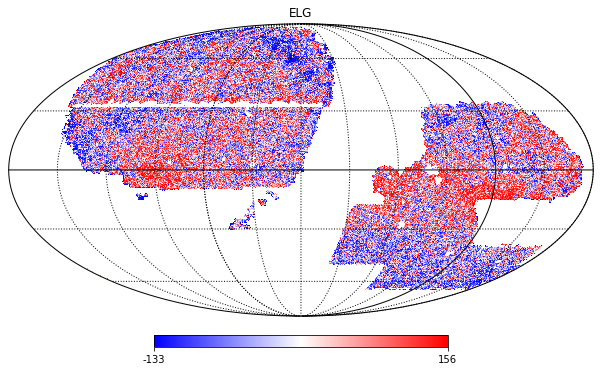

In [38]:
m_ELG = np.zeros(NPIX)

m_ELG[df.pixel_id.to_numpy()] = df.elg.to_numpy()
mask = (m_ELG == 0)
m_ELG[mask] = np.nan
hp.mollview(m_ELG, title="ELG", format='%i', norm='hist', cmap="bwr", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()
hp.write_map("number_count_maps/ELG_gold_256.fits", m_ELG, overwrite=True)


0.0 180.0 -180.0 180.0
setting the output map dtype to [dtype('float64')]


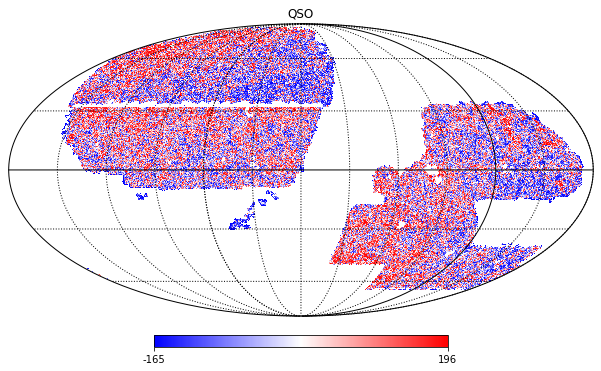

In [39]:
m_QSO = np.zeros(NPIX)

m_QSO[df.pixel_id.to_numpy()] = df.qso.to_numpy()
mask = (m_QSO == 0)
m_QSO[mask] = np.nan
hp.mollview(m_QSO, title="QSO", format='%i', norm='hist', cmap="bwr", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()
hp.write_map("number_count_maps/QSO_gold_256.fits", m_QSO, overwrite=True)

In [32]:
print(df.columns)

Index(['pixel_id', 'lrg', 'elg', 'qso', 'exposures', 'stellar', 'EBV',
       'airmass', 'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z', 'exptime_g',
       'exptime_r', 'exptime_z', 'meansky_g', 'meansky_r', 'meansky_z',
       'seeing_g', 'seeing_r', 'seeing_z', 'lrg_lin', 'elg_lin', 'qso_lin',
       'lrg_nn', 'elg_nn', 'qso_nn', 'lrg_deep', 'elg_deep', 'qso_deep'],
      dtype='object')


### Generating Maps of Linear Model Predictions

In [41]:
m_LRG = np.zeros(NPIX)

m_LRG[df.pixel_id.to_numpy()] = df.lrg_lin.to_numpy()
mask = (m_LRG == 0)
m_LRG[mask] = np.nan
hp.mollview(m_LRG, title="LRG", format='%i', norm='hist', cmap="bwr", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()
hp.write_map("number_count_maps/LRG_lin_256.fits", m_LRG, overwrite=True)

setting the output map dtype to [dtype('float64')]


0.0 180.0 -180.0 180.0
setting the output map dtype to [dtype('float64')]


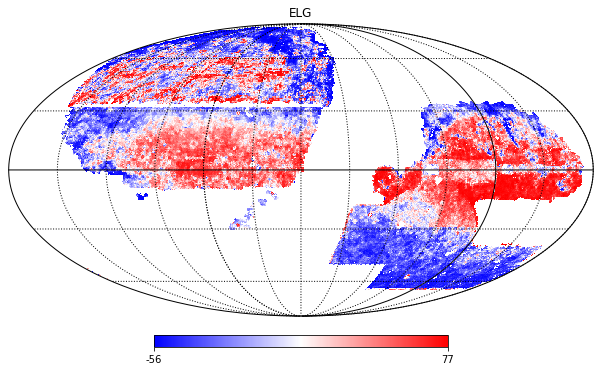

In [42]:
m_ELG = np.zeros(NPIX)

m_ELG[df.pixel_id.to_numpy()] = df.elg_lin.to_numpy()
mask = (m_ELG == 0)
m_ELG[mask] = np.nan
hp.mollview(m_ELG, title="ELG", format='%i', norm='hist', cmap="bwr", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()
hp.write_map("number_count_maps/ELG_lin_256.fits", m_ELG, overwrite=True)


0.0 180.0 -180.0 180.0
setting the output map dtype to [dtype('float64')]


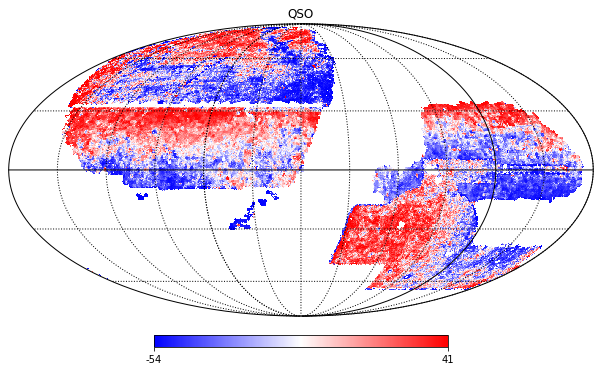

In [43]:
m_QSO = np.zeros(NPIX)

m_QSO[df.pixel_id.to_numpy()] = df.qso_lin.to_numpy()
mask = (m_QSO == 0)
m_QSO[mask] = np.nan
hp.mollview(m_QSO, title="QSO", format='%i', norm='hist', cmap="bwr", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()
hp.write_map("number_count_maps/QSO_lin_256.fits", m_QSO, overwrite=True)

### Generating Maps of DeepSets Model Predictions

0.0 180.0 -180.0 180.0
setting the output map dtype to [dtype('float64')]


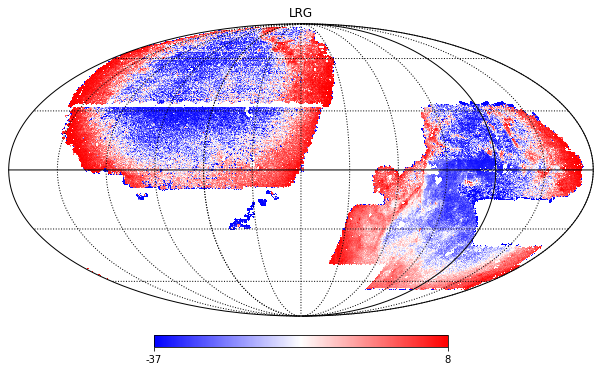

In [44]:
m_LRG = np.zeros(NPIX)

m_LRG[df.pixel_id.to_numpy()] = df.lrg_deep.to_numpy()
mask = (m_LRG == 0)
m_LRG[mask] = np.nan
hp.mollview(m_LRG, title="LRG", format='%i', norm='hist', cmap="bwr", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()
hp.write_map("number_count_maps/LRG_deep_256.fits", m_LRG, overwrite=True)

0.0 180.0 -180.0 180.0
setting the output map dtype to [dtype('float64')]


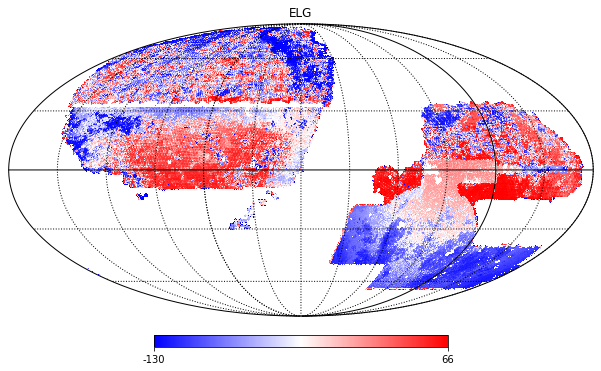

In [45]:
m_ELG = np.zeros(NPIX)

m_ELG[df.pixel_id.to_numpy()] = df.elg_deep.to_numpy()
mask = (m_ELG == 0)
m_ELG[mask] = np.nan
hp.mollview(m_ELG, title="ELG", format='%i', norm='hist', cmap="bwr", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()
hp.write_map("number_count_maps/ELG_deep_256.fits", m_ELG, overwrite=True)


0.0 180.0 -180.0 180.0
setting the output map dtype to [dtype('float64')]


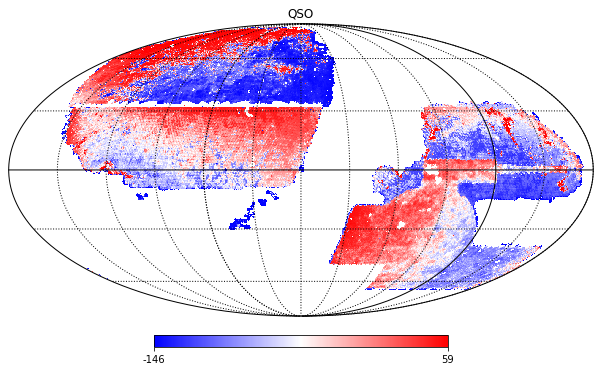

In [46]:
m_QSO = np.zeros(NPIX)

m_QSO[df.pixel_id.to_numpy()] = df.qso_deep.to_numpy()
mask = (m_QSO == 0)
m_QSO[mask] = np.nan
hp.mollview(m_QSO, title="QSO", format='%i', norm='hist', cmap="bwr", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()
hp.write_map("number_count_maps/QSO_deep_256.fits", m_QSO, overwrite=True)

In [47]:
print(m_QSO)
print(df.columns)

[nan nan nan ... nan nan nan]
Index(['pixel_id', 'lrg', 'elg', 'qso', 'exposures', 'stellar', 'EBV',
       'airmass', 'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z', 'exptime_g',
       'exptime_r', 'exptime_z', 'meansky_g', 'meansky_r', 'meansky_z',
       'seeing_g', 'seeing_r', 'seeing_z', 'lrg_lin', 'elg_lin', 'qso_lin',
       'lrg_nn', 'elg_nn', 'qso_nn', 'lrg_deep', 'elg_deep', 'qso_deep'],
      dtype='object')


### Visualising a map

In [ ]:
m_LRG = hp.read_map("number_count_maps/LRG_gold_256.fits")
hp.mollview(m_LRG, title="LRG", format='%i', norm='hist', cmap="bwr", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

### Cleaned MAPS 256

What is actually meant by cleaned maps?


### Maps at 2048 NORTH


In [53]:
NSIDE = 2048
NPIX = hp.nside2npix(NSIDE)
def raDec2thetaPhi(ra, dec):
    return (0.5 * np.pi - np.deg2rad(dec)), (np.deg2rad(ra))


In [61]:
# Import Northern Galaxies and Drop NAS and DUPLS
df_north = pd.read_csv('../bricks_data/galaxy_catalogue_north.csv',
                       dtype={'BrickID': 'int32', 'LRG': 'int8', 'ELG': 'int8', 'QSO': 'int8'})
df_north = df_north.drop_duplicates()
# Removing all Lines with Nan that were added to ensure that all bricks are stored
df_north = df_north.dropna(axis=0, inplace=False, how='any')

### 2. Get Galaxy Count per 2048 Healpy Pixel

### NORTH

In [62]:
# LRG
df_LRG = df_north[df_north["LRG"] == 1]
ra_LRG = df_LRG["RA"].to_numpy(copy=True)
dec_LRG = df_LRG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_LRG, dec_LRG)

LRG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(LRG_pixel_indices, return_counts=True)

mean_LRG = counts.mean()
print("Mean LRGs per Pixel:", mean_LRG)
# Calculating Densities for every block
id_density = np.stack((unique, counts), axis=1)
df_lrg = pd.DataFrame(id_density, columns=['pixel_id', 'lrg'])
df_lrg.pixel_id = df_lrg.pixel_id.astype(int)

Mean LRGs per Pixel: 1.4535700059544587


In [63]:
# elg
df_ELG = df_north[df_north["ELG"] == 1]
ra_ELG = df_ELG["RA"].to_numpy(copy=True)
dec_ELG = df_ELG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_ELG, dec_ELG)
ELG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(ELG_pixel_indices, return_counts=True)
mean_ELG = counts.mean()
print("Mean ELGs per Pixel:", mean_ELG)
id_density = np.stack((unique, counts), axis=1)
df_elg = pd.DataFrame(id_density, columns=['pixel_id', 'elg'])
df_elg.pixel_id = df_elg.pixel_id.astype(int)

Mean ELGs per Pixel: 2.347347050336317


In [64]:
df_QSO = df_north[df_north["QSO"] == 1]
ra_QSO = df_QSO["RA"].to_numpy(copy=True)
dec_QSO = df_QSO["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_QSO, dec_QSO)
QSO_pixel_indices = hp.ang2pix(NSIDE, theta, phi)
# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(QSO_pixel_indices, return_counts=True)
mean_QSO = counts.mean()
print("Mean QSOs per Pixel:", mean_QSO)

id_density = np.stack((unique, counts), axis=1)
df_qso = pd.DataFrame(id_density, columns=['pixel_id', 'qso'])
df_qso.pixel_id = df_qso.pixel_id.astype(int)

Mean QSOs per Pixel: 2.7237364970237756


In [65]:
df_north = pd.merge(df_lrg, df_elg, how='outer', on='pixel_id')
df_north = pd.merge(df_north, df_qso, how='outer', on='pixel_id')
print(df_lrg.shape, df_elg.shape, df_qso.shape, df_north.shape)

df_north.fillna(axis=0, value=0, inplace=True)

(2435150, 2) (5301401, 2) (5601728, 2) (6237002, 4)


In [79]:
df_north = df_north.astype(int)

### SOUTH

In [82]:
df_south = pd.read_csv('../bricks_data/galaxy_catalogue_south.csv',
                       dtype={'BrickID': 'int32', 'LRG': 'int8', 'ELG': 'int8', 'QSO': 'int8'})
df_south = df_south.drop_duplicates()

# Removing all Lines with Nan that were added to ensure that all bricks are stored
df_south = df_south.dropna(axis=0, inplace=False, how='any')


,BrickID,RA,DEC,LRG,ELG,QSO
0,387694,350.870568,9.868695,1,0,0
1,387694,350.871680,9.637755,0,1,0
2,387694,350.872142,9.694869,0,0,1
3,387694,350.872631,9.724626,0,0,1
4,387694,350.873243,9.683394,0,1,0


### Removing the Large Magellanic Cloud at Area
Large Magellanic Cloud (Ra 52:100 and DEC -70 to -50 respectively)

In [83]:
df_magellanic = df_south[(df_south['RA'] <=100) & (df_south['RA'] >=52) & (df_south['DEC'] <= -50) & (df_south['DEC'] >= -70)]


### 2. Get Galaxy Count per Healpy Pixel

In [84]:
# Magellanic
ra_magellanic = df_magellanic["RA"].to_numpy(copy=True)
dec_magellanic = df_magellanic["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_magellanic, dec_magellanic)

magellanic_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(magellanic_pixel_indices, return_counts=True)


mean_magellanic = counts.mean()
print("Mean LRGs per Pixel:", mean_magellanic)

id_density = np.stack((unique, counts), axis=1)
df_magellanic = pd.DataFrame(id_density, columns=['pixel_id', 'lrg'])
df_magellanic.pixel_id = df_magellanic.pixel_id.astype(int)


[44439895 44439896 44439898 ... 48529184 48529189 48529195]
Mean LRGs per Pixel: 5.913046884793782


In [85]:
# LRG

df_LRG = df_south[df_south["LRG"] == 1]
ra_LRG = df_LRG["RA"].to_numpy(copy=True)
dec_LRG = df_LRG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_LRG, dec_LRG)

LRG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(LRG_pixel_indices, return_counts=True)

mean_LRG = counts.mean()
print("Mean LRGs per Pixel:", mean_LRG)

id_density = np.stack((unique, counts), axis=1)
df_lrg = pd.DataFrame(id_density, columns=['pixel_id', 'lrg'])
df_lrg.pixel_id = df_lrg.pixel_id.astype(int)

Mean LRGs per Pixel: 1.4357477376444


In [86]:
# elg

df_ELG = df_south[df_south["ELG"] == 1]
ra_ELG = df_ELG["RA"].to_numpy(copy=True)
dec_ELG = df_ELG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_ELG, dec_ELG)
ELG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(ELG_pixel_indices, return_counts=True)


mean_ELG = counts.mean()
print("Mean ELGs per Pixel:", mean_ELG)

id_density = np.stack((unique, counts), axis=1)
df_elg = pd.DataFrame(id_density, columns=['pixel_id', 'elg'])
df_elg.pixel_id = df_elg.pixel_id.astype(int)


Mean ELGs per Pixel: 2.3978510869878873
[[10446439        1]
 [10446440        1]
 [10446442        1]
 ...
 [48525409        1]
 [48525410        4]
 [48529184        1]]


In [87]:
df_QSO = df_south[df_south["QSO"] == 1]
ra_QSO = df_QSO["RA"].to_numpy(copy=True)
dec_QSO = df_QSO["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_QSO, dec_QSO)
QSO_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(QSO_pixel_indices, return_counts=True)

mean_QSO = counts.mean()
print("Mean QSOs per Pixel:", mean_QSO)
id_density = np.stack((unique, counts), axis=1)
df_qso = pd.DataFrame(id_density, columns=['pixel_id', 'qso'])
df_qso.pixel_id = df_qso.pixel_id.astype(int)

[10446439 10446441 10446443 ... 48525409 48525410 48529189]
Mean QSOs per Pixel: 2.8430281724440047


In [88]:
df_south = pd.merge(df_lrg, df_elg, how='outer', on='pixel_id')
df_south = pd.merge(df_south, df_qso, how='outer', on='pixel_id')
print(df_lrg.shape, df_elg.shape, df_qso.shape, df_south.shape)

(6748276, 2) (15421285, 2) (16404931, 2) (17993892, 4)


In [89]:
df_south.fillna(axis=0, value=0, inplace=True)

In [90]:
df_south = df_south.astype(int)
df_magellanic = df_magellanic.astype(int)

In [91]:
print(len(df_south))
intersection = pd.Series(list(set(df_south.pixel_id) & set(df_magellanic.pixel_id)))
print(len(intersection))
df_south = df_south[~(df_south['pixel_id'].isin(intersection))]
print(len(df_south))


17993892
446712
17547180


In [ ]:
# Concatenating south and North

pdList = [df_south, df_north, df_des]  # List of your dataframes
df = pd.concat(pdList)

df.describe()


print(len(df.pixel_id))
df = df.drop_duplicates(subset=['pixel_id'], keep=False)
print(len(df.pixel_id))

